In [54]:
import matplotlib
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow

(500, 500)


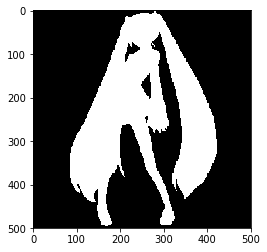

In [57]:
miku = pd.read_csv("../data/miku")
miku = np.array(miku.values)

miku_grayscale = miku[:, 2]

miku_grayscale = miku_grayscale.reshape((500, 500))
miku_grayscale = miku_grayscale.transpose()

image = Image.fromarray(miku_grayscale*255)
print(image.size)
imshow(image)
# image.show()